In [53]:
import numpy as np
import random
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import array_to_latex

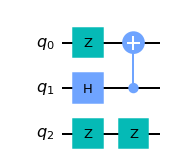

In [54]:
qc = QuantumCircuit(3)
for i in range(0,int(random.randint(0,5))):
    gate = random.choice((1,2,3,4,5))
    if gate == 5:
        q = random.sample(tuple(range(0,3)),2)
    else:
        q = random.choice(tuple(range(0,3)))
    
    if gate==1:
        qc.x(q)
    elif gate==2:
        qc.y(q)
    elif gate==3:
        qc.z(q)
    elif gate==4:
        qc.h(q)
    else:
        qc.cnot(q[0],q[1])

qc.draw('mpl')
    
    

In [55]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>